## **This example implements a quadtree that is used to do image segmentation. **

The original example can be found at:
https://jrtechs.net/photography/segmenting-images-with-quadtrees


In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2

# matplotlib for displaying the images 
from matplotlib import pyplot as plt
import matplotlib.patches as patches

import random
import math
import numpy as np

#img = cv2.imread('DSC04250.png')

def printI(img):
    fig= plt.figure(figsize=(20, 20))
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    
def printI2(i1, i2):
    fig= plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(cv2.cvtColor(i1, cv2.COLOR_BGR2RGB))
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(cv2.cvtColor(i2, cv2.COLOR_BGR2RGB))

In [3]:
#printI(img)

Let's look at the code


In [4]:
class Node():
    def __init__(self, x0, y0, w, h):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.children = []

    def get_width(self):
        return self.width

    def get_height(self):
        return self.height

    def get_points(self):
        return self.points

    def get_points(self, img):
        return img[self.x0:self.x0 + self.get_width(), self.y0:self.y0 + self.get_height()]

    def get_error(self, img):
        pixels = self.get_points(img)
        b_avg = np.mean(pixels[:, :, 0])
        b_mse = np.square(np.subtract(pixels[:, :, 0], b_avg)).mean()

        g_avg = np.mean(pixels[:, :, 1])
        g_mse = np.square(np.subtract(pixels[:, :, 1], g_avg)).mean()

        r_avg = np.mean(pixels[:, :, 2])
        r_mse = np.square(np.subtract(pixels[:, :, 2], r_avg)).mean()

        e = r_mse * 0.2989 + g_mse * 0.5870 + b_mse * 0.1140

        return (e * img.shape[0] * img.shape[1]) / 90000000



In [5]:
class QTree():
    def __init__(self, stdThreshold, minPixelSize, img):
        self.threshold = stdThreshold
        self.min_size = minPixelSize
        self.minPixelSize = minPixelSize
        self.img = img
        self.root = Node(0, 0, img.shape[0], img.shape[1])

    def get_points(self):
        return img[self.root.x0:self.root.x0 + self.root.get_width(),
               self.root.y0:self.root.y0 + self.root.get_height()]

    def subdivide(self):
        recursive_subdivide(self.root, self.threshold, self.minPixelSize, self.img)

    def graph_tree(self):
        fig = plt.figure(figsize=(10, 10))
        plt.title("Quadtree")
        c = find_children(self.root)
        print("Number of segments: %d" % len(c))
        for n in c:
            plt.gcf().gca().add_patch(patches.Rectangle((n.y0, n.x0), n.height, n.width, fill=False))
        plt.gcf().gca().set_xlim(0, img.shape[1])
        plt.gcf().gca().set_ylim(img.shape[0], 0)
        plt.axis('equal')
        plt.show()
        return

    def render_img(self, thickness=1, color=(0, 0, 255)):
        imgc = self.img.copy()
        c = find_children(self.root)
        for n in c:
            pixels = n.get_points(self.img)
            # grb
            gAvg = math.floor(np.mean(pixels[:, :, 0]))
            rAvg = math.floor(np.mean(pixels[:, :, 1]))
            bAvg = math.floor(np.mean(pixels[:, :, 2]))

            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0 + n.get_height(), 0] = gAvg
            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0 + n.get_height(), 1] = rAvg
            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0 + n.get_height(), 2] = bAvg

        if thickness > 0:
            for n in c:
                # Draw a rectangle
                imgc = cv2.rectangle(imgc, (n.y0, n.x0), (n.y0 + n.get_height(), n.x0 + n.get_width()), color,
                                     thickness)
        return imgc


def recursive_subdivide(node, k, minPixelSize, img):
    if node.get_error(img) <= k:
        return
    w_1 = int(math.floor(node.width / 2))
    w_2 = int(math.ceil(node.width / 2))
    h_1 = int(math.floor(node.height / 2))
    h_2 = int(math.ceil(node.height / 2))

    if w_1 <= minPixelSize or h_1 <= minPixelSize:
        return
    x1 = Node(node.x0, node.y0, w_1, h_1)  # top left
    recursive_subdivide(x1, k, minPixelSize, img)

    x2 = Node(node.x0, node.y0 + h_1, w_1, h_2)  # btm left
    recursive_subdivide(x2, k, minPixelSize, img)

    x3 = Node(node.x0 + w_1, node.y0, w_2, h_1)  # top right
    recursive_subdivide(x3, k, minPixelSize, img)

    x4 = Node(node.x0 + w_1, node.y0 + h_1, w_2, h_2)  # btm right
    recursive_subdivide(x4, k, minPixelSize, img)

    node.children = [x1, x2, x3, x4]


def find_children(node):
    if not node.children:
        return [node]
    else:
        children = []
        for child in node.children:
            children += (find_children(child))
    return children


In [10]:
#qtTemp = QTree(4, 3, img)  #contrast threshold, min cell size, img
#qtTemp.subdivide() # recursively generates quad tree
#qtTemp.graph_tree()


NameError: ignored

Let's display the rendered version alongside the original photograph. 

In [7]:
def concat_images(img1, img2, boarder=5, color=(255,255,255)):
    img1_boarder = cv2.copyMakeBorder(
                 img1, 
                 boarder, #top
                 boarder, #btn
                 boarder, #left
                 boarder, #right
                 cv2.BORDER_CONSTANT, 
                 value=color
              )
    img2_boarder = cv2.copyMakeBorder(
                 img2, 
                 boarder, #top
                 boarder, #btn
                 0, #left
                 boarder, #right
                 cv2.BORDER_CONSTANT, 
                 value=color
              )
    return np.concatenate((img1_boarder, img2_boarder), axis=1)

Next, we wrap the quadtree algorithm with the output visualization to make creating the diptychs easier. The left is the original image, where the right is the rendered quadtree version. 

In [8]:
def displayQuadTree(img_name, threshold=7, minCell=3, img_boarder=20, line_boarder=1, line_color=(0,0,255)):
    imgT= cv2.imread(img_name)
    qt = QTree(threshold, minCell, imgT) 
    qt.subdivide()
    qtImg= qt.render_img(thickness=line_boarder, color=line_color)
    file_name = "output/" + img_name.split("/")[-1]
    cv2.imwrite(file_name,qtImg)
    file_name_2 = "output/diptych-" + img_name[-6] + img_name[-5] + ".jpg"
    hConcat = concat_images(imgT, qtImg, boarder=img_boarder, color=(255,255,255))
    cv2.imwrite(file_name_2,hConcat)
    printI(hConcat)

#displayQuadTree("night.png", threshold=3, img_boarder=20, line_color=(0,0,0), line_boarder = 1)


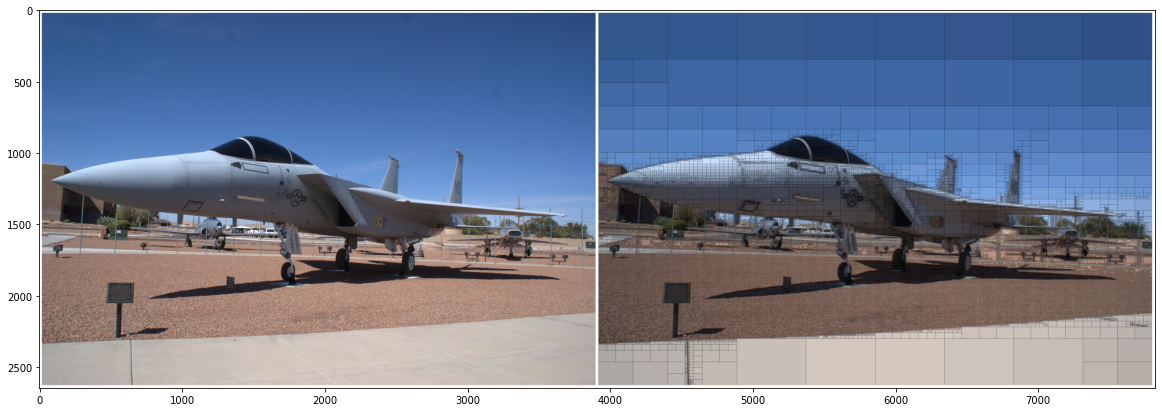

In [9]:
displayQuadTree('DSC04250.jpg', threshold=3, img_boarder=20, line_color=(0,0,0), line_boarder = 1)